# COVID-19 Argentina por RJC

In [131]:
import os              # This provides several system utilities
import pandas as pd    # This is the workhorse of data munging in Python
import matplotlib.pyplot as plt
import seaborn as sns  # This allows us to easily and beautifully plot

# This ensures visualizations are plotted inside the notebook
%matplotlib inline

### Abro archivo con los datos del gobierno, Tasa diaria de contagios y muertos, total de recuperados y de tests

In [132]:
f = 'Covid19_Arg.txt'    # Path to file containing the file
df = pd.read_csv(f)    # Read csv file with comma sepparation
df.tail(10)

,Fecha,Contagios,Muertos,Recuperados_tot,Tests
96,6/9/2020,1141,24,"7,568","203,051"
97,6/10/2020,1226,18,"7,991","208,519"
98,6/11/2020,1386,30,"8,332","214,807"
99,6/12/2020,1391,20,"8,743","221,305"
100,6/13/2020,1530,30,"9,083","228,324"
101,6/14/2020,1282,18,"9,564","234,370"
102,6/15/2020,1208,21,"9,891","239,941"
103,6/16/2020,1374,24,"10,174","245,059"
104,6/17/2020,1393,35,"10,512","250,615"
105,6/18/2020,1958,35,"10,721","257,092"


### Separo por comas y indexto los dias a la tabla para graficar facilmente

In [133]:
df.set_index(pd.DatetimeIndex(df['Fecha']),inplace=True)
df.drop('Fecha', axis=1, inplace=True)
#df['Recuperados_tot'] = pd.to_numeric(df['Recuperados_tot'])

df.tail(10) #ultimos 10 valores

,Contagios,Muertos,Recuperados_tot,Tests
Fecha,,,,
2020-06-09,1141,24,"7,568","203,051"
2020-06-10,1226,18,"7,991","208,519"
2020-06-11,1386,30,"8,332","214,807"
2020-06-12,1391,20,"8,743","221,305"
2020-06-13,1530,30,"9,083","228,324"
2020-06-14,1282,18,"9,564","234,370"
2020-06-15,1208,21,"9,891","239,941"
2020-06-16,1374,24,"10,174","245,059"
2020-06-17,1393,35,"10,512","250,615"


### Calculo la tasa diaria de recuperados, activos y tests

In [134]:
df['Recuperados'] = df['Recuperados_tot'].diff()
df['Tests_diario'] = df['Tests'].diff()
df['Activos']=df['Contagios']-df['Recuperados']-df['Muertos']
df['Activos'] = pd.to_numeric(df['Activos'])
df.tail(10)

,Contagios,Muertos,Recuperados_tot,Tests,Recuperados,Tests_diario,Activos
Fecha,,,,,,,
2020-06-09,1141,24,"7,568","203,051",263,"4,531",854
2020-06-10,1226,18,"7,991","208,519",423,"5,468",785
2020-06-11,1386,30,"8,332","214,807",341,"6,288","1,015"
2020-06-12,1391,20,"8,743","221,305",411,"6,498",960
2020-06-13,1530,30,"9,083","228,324",340,"7,019","1,160"
2020-06-14,1282,18,"9,564","234,370",481,"6,046",783
2020-06-15,1208,21,"9,891","239,941",327,"5,571",860
2020-06-16,1374,24,"10,174","245,059",283,"5,118","1,067"
2020-06-17,1393,35,"10,512","250,615",338,"5,556","1,020"


### Calculo el total de contagios, muertos y activos

In [135]:
df['Contagios_tot'] = df['Contagios'].cumsum()
df['Muertos_tot'] = df['Muertos'].cumsum()
df['Activos_tot']=df['Contagios_tot']-df['Recuperados_tot']-df['Muertos_tot']

pd.options.display.float_format = '{:,.0f}'.format #en enteros sin coma
df.tail(10)

,Contagios,Muertos,Recuperados_tot,Tests,Recuperados,Tests_diario,Activos,Contagios_tot,Muertos_tot,Activos_tot
Fecha,,,,,,,,,,
2020-06-09,1141,24,"7,568","203,051",263,"4,531",854,24762,717,"16,477"
2020-06-10,1226,18,"7,991","208,519",423,"5,468",785,25988,735,"17,262"
2020-06-11,1386,30,"8,332","214,807",341,"6,288","1,015",27374,765,"18,277"
2020-06-12,1391,20,"8,743","221,305",411,"6,498",960,28765,785,"19,237"
2020-06-13,1530,30,"9,083","228,324",340,"7,019","1,160",30295,815,"20,397"
2020-06-14,1282,18,"9,564","234,370",481,"6,046",783,31577,833,"21,180"
2020-06-15,1208,21,"9,891","239,941",327,"5,571",860,32785,854,"22,040"
2020-06-16,1374,24,"10,174","245,059",283,"5,118","1,067",34159,878,"23,107"
2020-06-17,1393,35,"10,512","250,615",338,"5,556","1,020",35552,913,"24,127"


### Grafico de tasa diaria

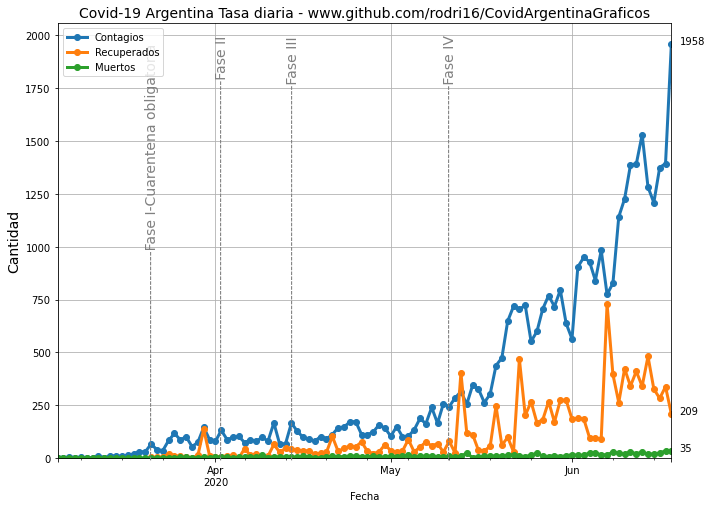

In [136]:
ax=df.plot(y=['Contagios','Recuperados','Muertos'], legend='true',style='-',grid='on',figsize=(11,8),linewidth=3, marker='o')

plt.title('Covid-19 Argentina Tasa diaria - www.github.com/rodri16/CovidArgentinaGraficos',fontsize=14)
plt.legend(['Contagios', 'Recuperados',"Muertos"],loc='upper left');
plt.ylabel('Cantidad', fontsize=14)
#ax.text('2020-4-2',280,'https://github.com/rodri16/CovidArgentinaGraficos',fontsize=10)
#agrega ultimo numero
for var in (df.Contagios,df.Recuperados,df.Muertos):
    plt.annotate('%d' % var.iloc[-1], xy=(1, var.iloc[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')

    # Add labels to the plot
style = dict(size=14, color='gray')    
#Texto de la cuarentena obligatoria
ax.text('2020-3-20', 10, "-------------------------------------------Fase I-Cuarentena obligatoria",rotation=90, **style)
#Texto de la Fase II
ax.text('2020-4-1', 10, "------------------------------------------------------------------------------Fase II",rotation=90, **style)
#Texto de la Fase III
ax.text('2020-4-13', 10, "-----------------------------------------------------------------------------Fase III",rotation=90, **style)
#Texto de la Fase IV
ax.text('2020-5-10', 10, "-----------------------------------------------------------------------------Fase IV",rotation=90, **style)


#valor minimo eje y = 0
plt.gca().set_ylim(bottom=0)


#Salvo el grafico con la ultima fecha
name='Graficos/TasaDiariaLine_'+df.index[-1].strftime("%d%b")#str(df.index[-1])+'.png'
plt.savefig(name)

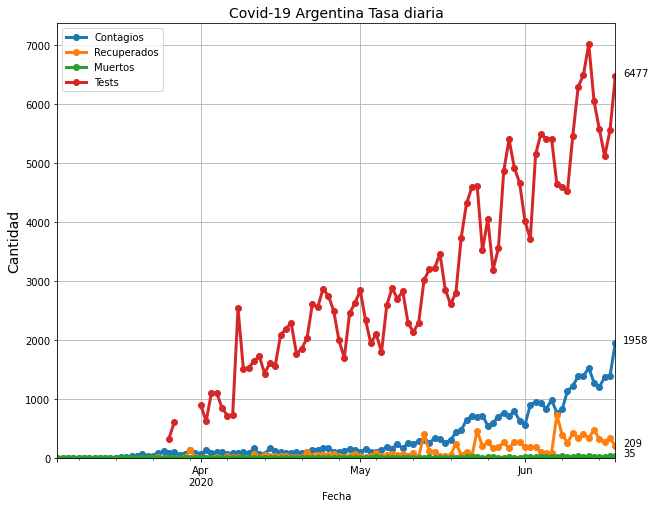

In [137]:
#agrego los tests pero no se ve nada (mejor en logaritmico)
ax=df.plot(y=['Contagios','Recuperados','Muertos','Tests_diario'], legend='true',style='-',grid='on',figsize=(10,8),linewidth=3, marker='o')

plt.title('Covid-19 Argentina Tasa diaria',fontsize=14)
plt.legend(['Contagios', 'Recuperados',"Muertos","Tests"],loc='upper left');
plt.ylabel('Cantidad', fontsize=14)

#agrega ultimo numero
for var in (df.Contagios,df.Recuperados,df.Muertos,df.Tests_diario):
    plt.annotate('%d' % var.iloc[-1], xy=(1, var.iloc[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')
    
#valor mininmo en y = 0
plt.gca().set_ylim(bottom=0)

#salvo grafico
name='Graficos/TasaDiariaFullLine_'+df.index[-1].strftime("%d%b")#str(df.index[-1])+'.png'
#plt.savefig(name)

### Grafico de barras de las tasas diarias (solo otra manera de verlo)

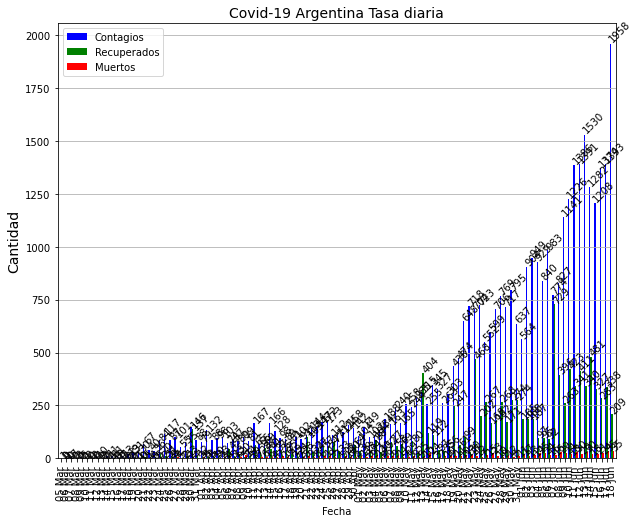

In [138]:
ax=df.plot.bar(y=['Contagios','Recuperados','Muertos'],color=['blue','green','red'],width=0.8, legend='true',figsize=(10,8))
#arreglo el formato de la fecha
plt.gca().xaxis.set_major_formatter(plt.FixedFormatter(df.index.to_series().dt.strftime("%d %b")))#arregla la fecha
#agrego grid
plt.grid(axis='y')
plt.title('Covid-19 Argentina Tasa diaria',fontsize=14)
plt.ylabel('Cantidad', fontsize=14)

#numeros arriba de la barra
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() * 0.995, p.get_height() * 1.005),rotation=45)

    #salvo grafico
name='Graficos/TasaDiariaBar_'+df.index[-1].strftime("%d%b")#str(df.index[-1])+'.png'
#plt.savefig(name)

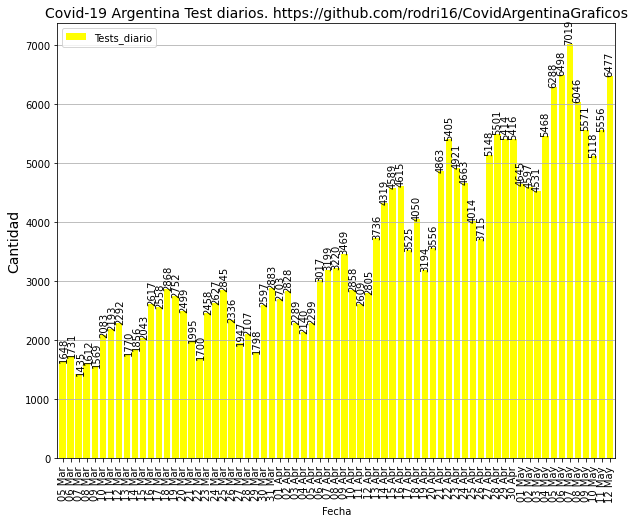

In [139]:
ax=df[df.index > '2020-4-10'].Tests_diario.plot.bar(color=['yellow'],width=0.8, legend='true',figsize=(10,8))
#arreglo el formato de la fecha
plt.gca().xaxis.set_major_formatter(plt.FixedFormatter(df.index.to_series().dt.strftime("%d %b")))#arregla la fecha
#agrego grid
plt.grid(axis='y')
plt.title('Covid-19 Argentina Test diarios. https://github.com/rodri16/CovidArgentinaGraficos',fontsize=14)
plt.ylabel('Cantidad', fontsize=14)

#numeros arriba de la barra
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() * 0.995, p.get_height() * 1.005),rotation=90)

    #salvo grafico
name='Graficos/TestDiarioBar_'+df.index[-1].strftime("%d%b")#str(df.index[-1])+'.png'
plt.savefig(name)

### Grafico total contagios y Activos

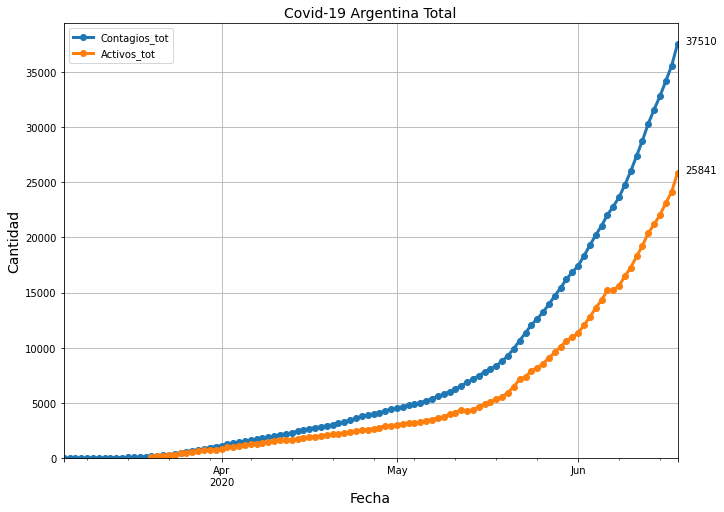

In [140]:
ax=df.plot(y=['Contagios_tot','Activos_tot'], style='-',grid='on',figsize=(11,8),linewidth=3, marker='o')
plt.title('Covid-19 Argentina Total',fontsize=14)
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Cantidad', fontsize=14)

#agrega ultimo numero
for var in (df.Contagios_tot,df.Activos_tot):
    plt.annotate('%d' % var.iloc[-1], xy=(1, var.iloc[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')

#valor mininmo en y = 0
plt.gca().set_ylim(bottom=0)

#salvo grafico
name='Graficos/Contagios_tot_'+df.index[-1].strftime("%d%b")#str(df.index[-1])+'.png'
#plt.savefig(name)

### Agrego total Muertos

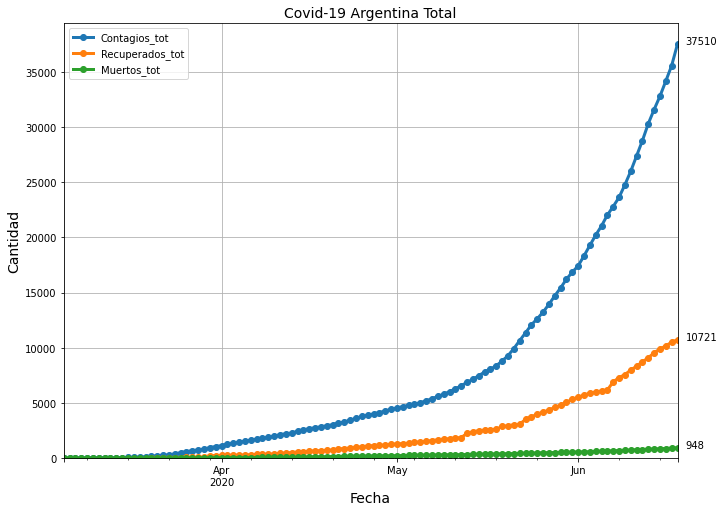

In [141]:
ax=df.plot(y=['Contagios_tot','Recuperados_tot','Muertos_tot'], style='-',grid='on',figsize=(11,8),linewidth=3, marker='o')
plt.title('Covid-19 Argentina Total',fontsize=14)
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Cantidad', fontsize=14)
plt.legend(loc='upper left');
#numeros arriba de la barra
#for p in ax.patches:
#    ax.annotate(int(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

#agrega ultimo numero
for var in (df.Contagios_tot,df.Recuperados_tot,df.Muertos_tot):
    plt.annotate('%d' % var.max(), xy=(1, var.max()), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')

#valor mininmo en y = 0
plt.gca().set_ylim(bottom=0)

name='Graficos/Contagios_tot_'+df.index[-1].strftime("%d%b")#str(df.index[-1])+'.png'
#plt.savefig(name)

### Grafico Totales (el mas completo!!)

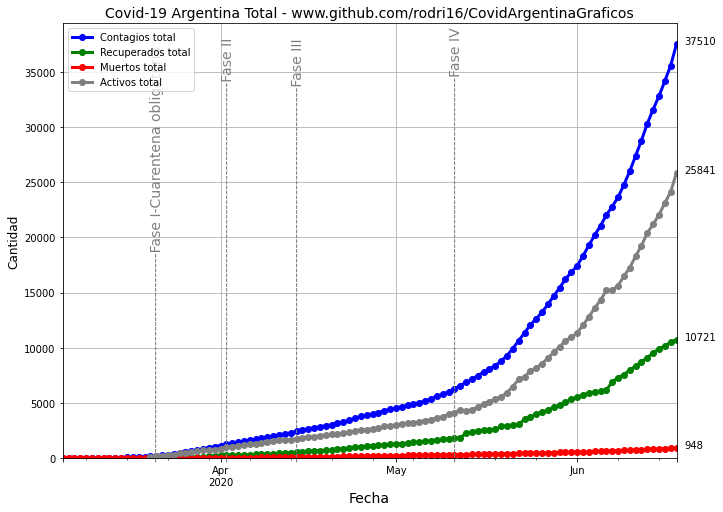

In [142]:
import matplotlib.ticker as mticker
ax=df.plot(y=['Contagios_tot','Recuperados_tot','Muertos_tot',"Activos_tot"],color=['blue',"green",'red','grey'], style='-',grid='on',figsize=(11,8),linewidth=3, marker='o')
plt.title('Covid-19 Argentina Total - www.github.com/rodri16/CovidArgentinaGraficos',fontsize=14)
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Cantidad', fontsize=12)
plt.legend(['Contagios total','Recuperados total','Muertos total',"Activos total"],loc='upper left');
#ax.text('2020-4-2',5800,'www.github.com/rodri16/CovidArgentinaGraficos',fontsize=10)

#agrega ultimo valor
for var in (df.Contagios_tot,df.Recuperados_tot,df.Muertos_tot,df.Activos_tot):
    plt.annotate('%d' % var.max(), xy=(1, var.max()), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')

# Add labels to the plot
style = dict(size=14, color='gray')

#Texto de la cuarentena obligatoria
ax.text('2020-3-20', 10, "-------------------------------------------Fase I-Cuarentena obligatoria",rotation=90, **style)
#Texto de la Fase II
ax.text('2020-4-1', 10, "------------------------------------------------------------------------------Fase II",rotation=90, **style)
#Texto de la Fase III
ax.text('2020-4-13', 10, "-----------------------------------------------------------------------------Fase III",rotation=90, **style)
#Texto de la Fase IV
ax.text('2020-5-10', 10, "-------------------------------------------------------------------------------Fase IV",rotation=90, **style)

#valor minimo en y = 0
plt.gca().set_ylim(bottom=0)

name='Graficos/Contagios_tot_'+df.index[-1].strftime("%d%b")#str(df.index[-1])+'.png'
plt.savefig(name)

### Grafico de totales igual al anterior pero en escala logaritmica, se pueden ver un poco mejor lo valores chicos con respecto a los grandes pero es un poco tricky

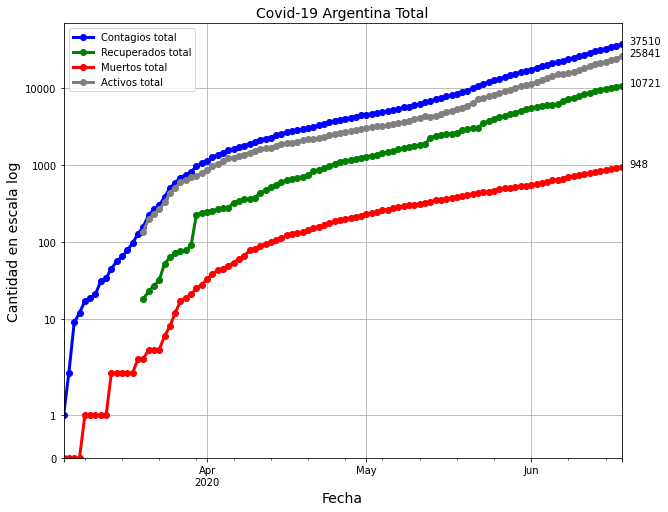

In [143]:
import matplotlib.ticker as mticker
ax=df.plot(y=['Contagios_tot','Recuperados_tot','Muertos_tot',"Activos_tot"],color=['blue',"green",'red','grey'],logy="sym", style='-',grid='on',figsize=(10,8),linewidth=3, marker='o')
plt.title('Covid-19 Argentina Total',fontsize=14)
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Cantidad en escala log', fontsize=14)
plt.legend(['Contagios total','Recuperados total','Muertos total',"Activos total"],loc='upper left');
ax.yaxis.set_major_formatter(mticker.ScalarFormatter())

for var in (df.Contagios_tot,df.Recuperados_tot,df.Muertos_tot,df.Activos_tot):
    plt.annotate('%d' % var.max(), xy=(1, var.max()), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')

plt.gca().set_ylim(bottom=0)

name='Graficos/Contagios_tot_log'+df.index[-1].strftime("%d%b")#str(df.index[-1])+'.png'
#plt.savefig(name)

### Agrego los test en escala logaritmica, aca se pueden ver todos los datos juntos gracias a la escala log

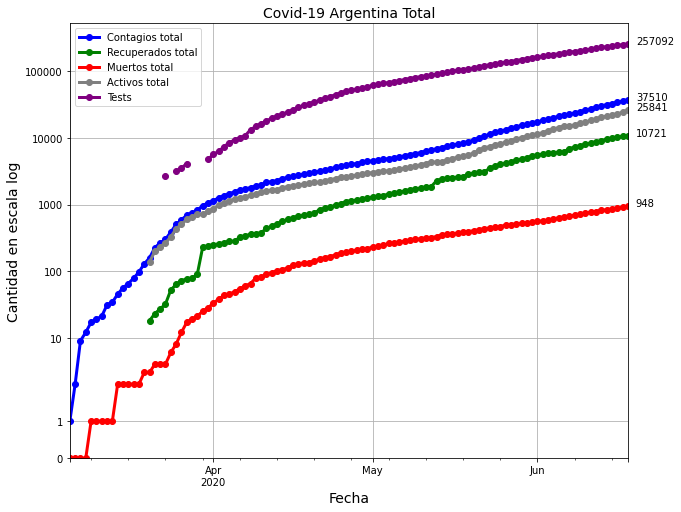

In [144]:
import matplotlib.ticker as mticker
ax=df.plot(y=['Contagios_tot','Recuperados_tot','Muertos_tot',"Activos_tot","Tests"],color=['blue',"green",'red','grey','purple'],logy="sym", style='-',grid='on',figsize=(10,8),linewidth=3, marker='o')
plt.title('Covid-19 Argentina Total',fontsize=14)
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Cantidad en escala log', fontsize=14)
plt.legend(['Contagios total','Recuperados total','Muertos total',"Activos total","Tests"],loc='upper left');
ax.yaxis.set_major_formatter(mticker.ScalarFormatter())

for var in (df.Contagios_tot,df.Recuperados_tot,df.Muertos_tot,df.Activos_tot,df.Tests):
    plt.annotate('%d' % var.max(), xy=(1, var.max()), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')

plt.gca().set_ylim(bottom=0)

name='Graficos/Contagios_totTests_log'+df.index[-1].strftime("%d%b")#str(df.index[-1])+'.png'
plt.savefig(name)

### Asi sin escala log, se ve la diferencia!!

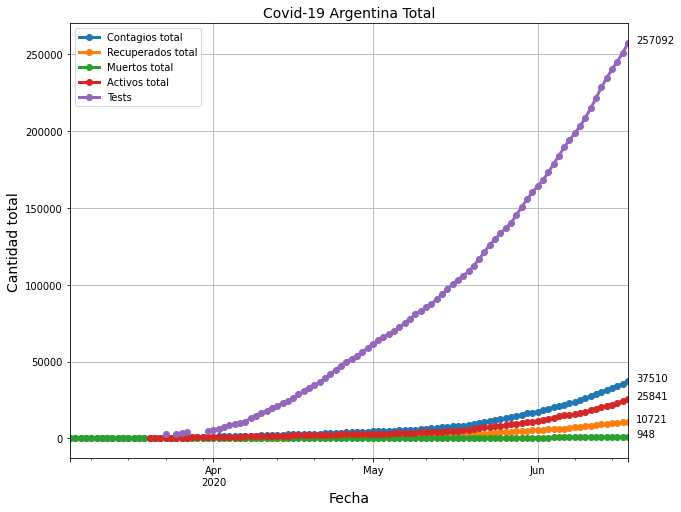

In [145]:
import matplotlib.ticker as mticker
ax=df.plot(y=['Contagios_tot','Recuperados_tot','Muertos_tot',"Activos_tot","Tests"], style='-',grid='on',figsize=(10,8),linewidth=3, marker='o')
plt.title('Covid-19 Argentina Total',fontsize=14)
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Cantidad total', fontsize=14)
plt.legend(['Contagios total','Recuperados total','Muertos total',"Activos total","Tests"],loc='upper left');
ax.yaxis.set_major_formatter(mticker.ScalarFormatter())

for var in (df.Contagios_tot,df.Recuperados_tot,df.Muertos_tot,df.Activos_tot,df.Tests):
    plt.annotate('%d' % var.max(), xy=(1, var.max()), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')


### Grafico de barras del total de contagios y activos

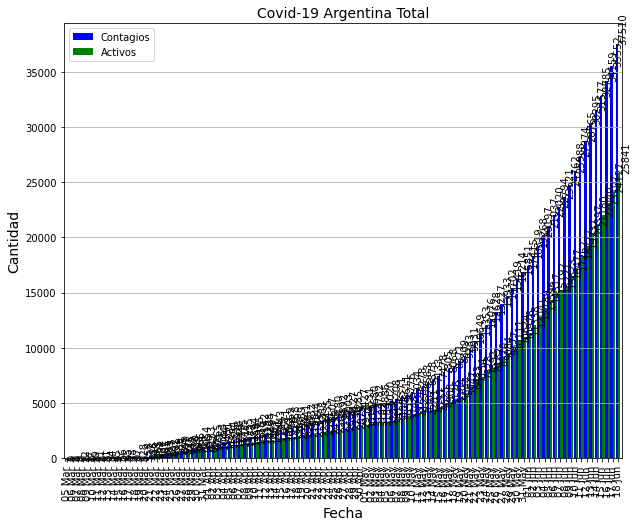

In [146]:
ax=df.plot.bar(y=['Contagios_tot','Activos_tot'],color=['blue','green'],figsize=(10,8),width=0.9)
plt.gca().xaxis.set_major_formatter(plt.FixedFormatter(df.index.to_series().dt.strftime("%d %b")))

plt.title('Covid-19 Argentina Total',fontsize=14)
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Cantidad', fontsize=14)
plt.legend(['Contagios', "Activos"],loc='upper left');
plt.grid(axis='y')

#numeros arriba de la barra
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005), rotation=90)

name='Graficos/Contagios_totBar_'+df.index[-1].strftime("%d%b")#str(df.index[-1])+'.png'
#plt.savefig(name)

### Subplots

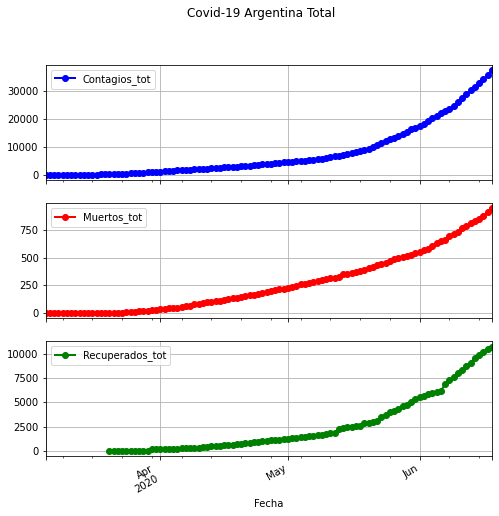

In [147]:
df.plot(y=['Contagios_tot','Muertos_tot', 'Recuperados_tot'],color=['blue','red','green'],figsize=(8,8),subplots='true',style='.-',grid='on',title='Covid-19 Argentina Total',linewidth=2, marker='o')#df[df['Contagios_tot'] > 100]

name='Graficos/Contagios_tot100_'+df.index[-1].strftime("%d%b")#str(df.index[-1])+'.png'
plt.savefig(name)

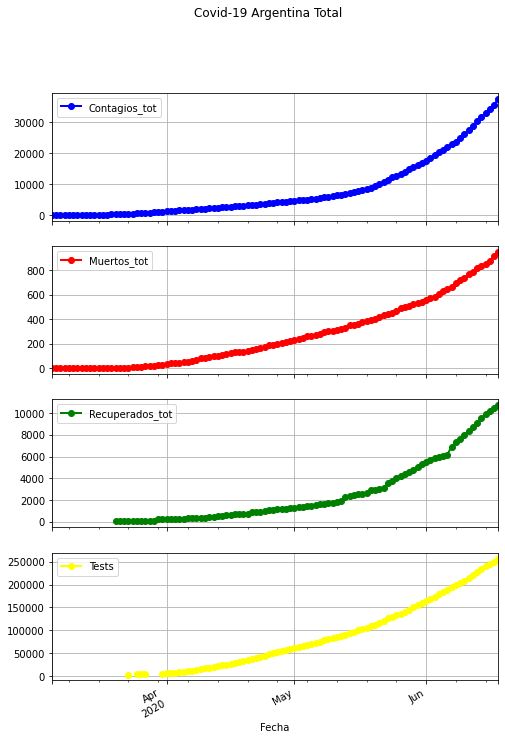

In [148]:
df.plot(y=['Contagios_tot','Muertos_tot', 'Recuperados_tot',"Tests"],color=['blue','red','green','yellow'],figsize=(8,12),subplots='true',style='.-',grid='on',title='Covid-19 Argentina Total',linewidth=2, marker='o')#df[df['Contagios_tot'] > 100]

name='Graficos/Todos_tot_'+df.index[-1].strftime("%d%b")#str(df.index[-1])+'.png'
plt.savefig(name)

### Grafico en escala log

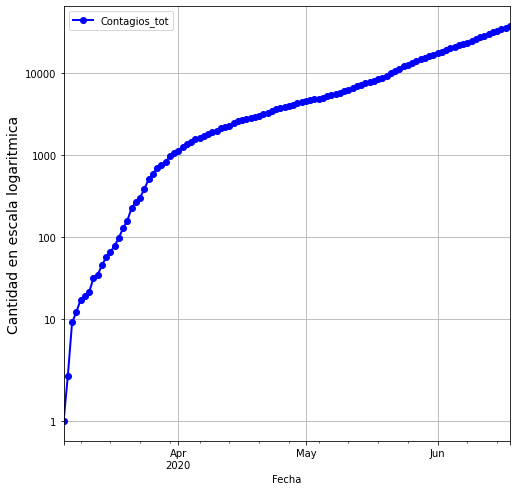

In [149]:
ax=df.plot(y=['Contagios_tot'],color=['blue'],figsize=(8,8),style='.-',grid='on',linewidth=2,logy="sym", marker='o')#df[df['Muertos_tot'] > 10]
plt.ylabel('Cantidad en escala logaritmica', fontsize=14)
ax.yaxis.set_major_formatter(mticker.ScalarFormatter())

name='Graficos/Contagios_tot_log_'+df.index[-1].strftime("%d%b")#str(df.index[-1])+'.png'
#plt.savefig(name)

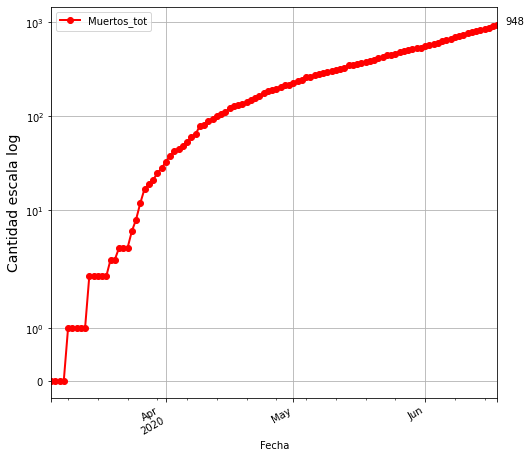

In [150]:
ax=df.plot(y=['Muertos_tot'],color=['red'],figsize=(8,8),subplots='true',style='.-',grid='on',logy="sym",linewidth=2, marker='o')#df[df['Muertos_tot'] > 10]
plt.ylabel('Cantidad escala log', fontsize=14)
plt.annotate('%d' % df.Muertos_tot.max(), xy=(1, df.Muertos_tot.max()), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')
name='Graficos/Muertos_tot10_'+df.index[-1].strftime("%d%b")#str(df.index[-1])+'.png'
#plt.savefig(name)

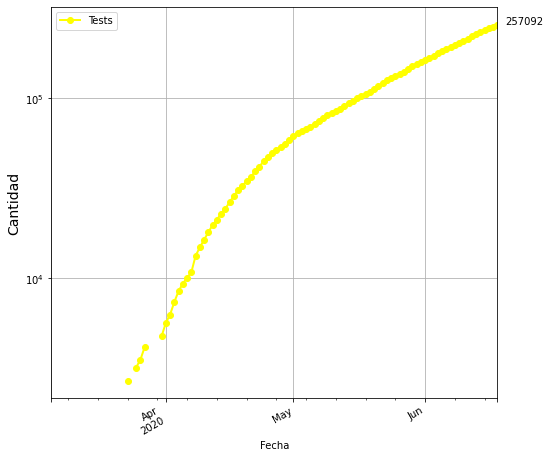

In [151]:
ax=df.plot(y=['Tests'],color=['yellow'],figsize=(8,8),subplots='true',style='.-',grid='on',logy="sym",linewidth=2, marker='o')#df[df['Muertos_tot'] > 10]
plt.ylabel('Cantidad', fontsize=14)
plt.annotate('%d' % df.Tests.max(), xy=(1, df.Tests.max()), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')
name='Graficos/Test_tot_'+df.index[-1].strftime("%d%b")#str(df.index[-1])+'.png'
#plt.savefig(name)

### Como quedo la tabla

In [152]:
df.describe()

,Contagios,Muertos,Recuperados_tot,Tests,Recuperados,Tests_diario,Activos,Contagios_tot,Muertos_tot,Activos_tot
count,106,106,91,84,90,81,90,106,106,91
mean,354,9,"2,725","93,201",119,"3,127",286,"7,886",269,"6,141"
std,431,8,"2,977","74,381",142,"1,639",342,"9,588",265,"6,537"
min,1,0,18,"2,695",1,328,-99,1,0,137
25%,81,3,454,"28,102",26,"1,947",66,"1,074",29,"1,629"
50%,143,7,"1,442","76,550",55,"2,752",107,"3,948",194,"3,184"
75%,590,12,"4,258","146,432",184,"4,589",407,"11,177",442,"8,827"
max,"1,958",35,"10,721","257,092",729,"7,019","1,714","37,510",948,"25,841"


## Meto todos los datos de la tabla en un archivo .csv  con la fecha

In [153]:
name='csv _datos_completos/Covid_arg_completo'+df.index[-1].strftime("%d%b")+'.csv'#str(df.index[-1])
df.to_csv(name, index=True)

### Probando interpolaciones...

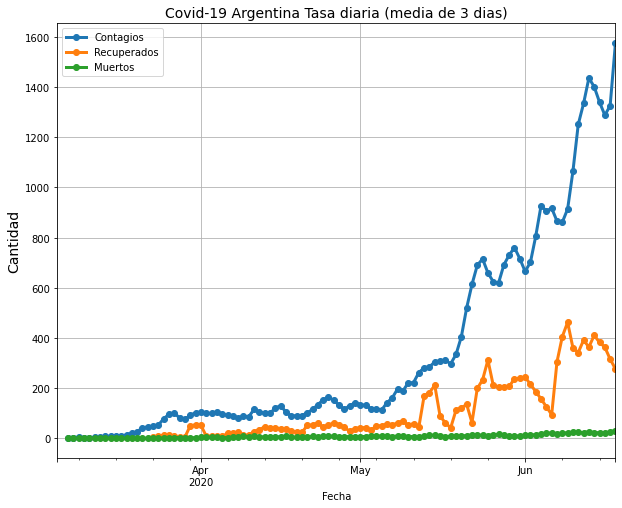

In [154]:
import numpy as np
N=3
df["Contagios_MA"]=df.Contagios.rolling(window=N).mean()
df["Recuperados_MA"]=df.Recuperados.rolling(window=N).mean()
df["Muertos_MA"]=df.Muertos.rolling(window=N).mean()
ax=df.plot(y=['Contagios_MA','Recuperados_MA','Muertos_MA'], legend='true',style='-',grid='on',figsize=(10,8),linewidth=3, marker='o')
plt.title('Covid-19 Argentina Tasa diaria (media de 3 dias)',fontsize=14)
plt.legend(['Contagios', 'Recuperados',"Muertos"],loc='upper left');
plt.ylabel('Cantidad', fontsize=14)

name='Graficos/TasaDiariaMA_'+df.index[-1].strftime("%d%b")#str(df.index[-1])+'.png'
#plt.savefig(name)

In [155]:
df.tail(5)

,Contagios,Muertos,Recuperados_tot,Tests,Recuperados,Tests_diario,Activos,Contagios_tot,Muertos_tot,Activos_tot,Contagios_MA,Recuperados_MA,Muertos_MA
Fecha,,,,,,,,,,,,,
2020-06-14,1282,18,"9,564","234,370",481,"6,046",783,31577,833,"21,180","1,401",411,23
2020-06-15,1208,21,"9,891","239,941",327,"5,571",860,32785,854,"22,040","1,340",383,23
2020-06-16,1374,24,"10,174","245,059",283,"5,118","1,067",34159,878,"23,107","1,288",364,21
2020-06-17,1393,35,"10,512","250,615",338,"5,556","1,020",35552,913,"24,127","1,325",316,27
2020-06-18,1958,35,"10,721","257,092",209,"6,477","1,714",37510,948,"25,841","1,575",277,31


### Relacion entre nuevos contagios y gente testeada

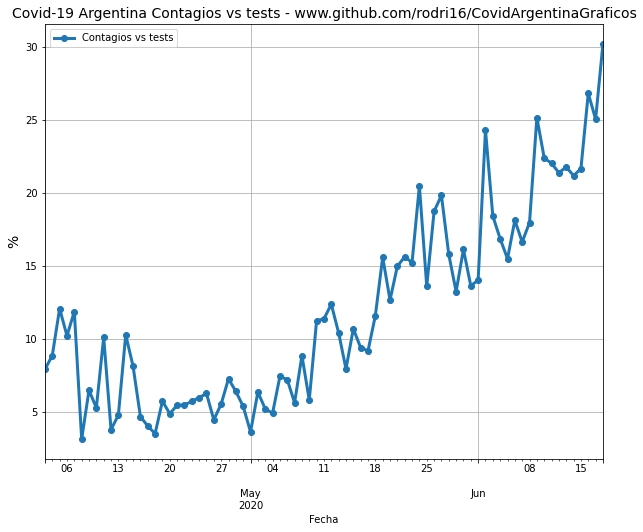

In [156]:
df['cont_test']=df['Contagios']/df['Tests_diario']*100
df[df.index > '2020-4-2']['cont_test'].plot(legend='true',style='-',grid='on',figsize=(10,8),linewidth=3, marker='o')
plt.title('Covid-19 Argentina Contagios vs tests - www.github.com/rodri16/CovidArgentinaGraficos',fontsize=14)
plt.legend(['Contagios vs tests'],loc='upper left');
plt.ylabel('%', fontsize=14)

name='Graficos/Tasa_Cont_Test'+df.index[-1].strftime("%d%b")#str(df.index[-1])+'.png'
plt.savefig(name)